In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#loading the dataset
app_energy = pd.read_csv('energydata_complete.csv')
app_energy.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [2]:
#displayig the columns and data types
print(app_energy.columns)

app_energy.info()

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  R

COLUMN INFORMATION

Date, time year-month-day hour:minute:second

Appliances, energy use in Wh

lights, energy use of light fixtures in the house in Wh

T1, Temperature in kitchen area, in Celsius

RH_1, Humidity in kitchen area, in %

T2, Temperature in living room area, in Celsius

RH_2, Humidity in living room area, in %

T3, Temperature in laundry room area

RH_3, Humidity in laundry room area, in %

T4, Temperature in office room, in Celsius

RH_4, Humidity in office room, in %

T5, Temperature in bathroom, in Celsius

RH_5, Humidity in bathroom, in %

T6, Temperature outside the building (north side), in Celsius

RH_6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius

RH_7, Humidity in ironing room, in %

T8, Temperature in teenager room 2, in Celsius

RH_8, Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius

RH_9, Humidity in parents room, in %

To, Temperature outside (from Chievres weather station), in Celsius

Pressure (from Chievres weather station), in mm Hg

RH_out, Humidity outside (from Chievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station), Â°C

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional

In [3]:
#Checking for null values
app_energy.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

EXPLORATORY DATA ANALYSIS

In [4]:
app_energy.describe(include='all')

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
unique,19735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-01-11 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,NaN,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,NaN,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,NaN,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,NaN,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,NaN,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769


In [5]:
#unique values
columns = app_energy.columns
print("The Number of Unique values in each column")
for n in columns:
    w=app_energy[n].nunique()
    print('"%s"' % n, 'has', w, 'unique values')

The Number of Unique values in each column
"date" has 19735 unique values
"Appliances" has 92 unique values
"lights" has 8 unique values
"T1" has 722 unique values
"RH_1" has 2547 unique values
"T2" has 1650 unique values
"RH_2" has 3376 unique values
"T3" has 1426 unique values
"RH_3" has 2618 unique values
"T4" has 1390 unique values
"RH_4" has 2987 unique values
"T5" has 2263 unique values
"RH_5" has 7571 unique values
"T6" has 4446 unique values
"RH_6" has 9709 unique values
"T7" has 1955 unique values
"RH_7" has 5891 unique values
"T8" has 2228 unique values
"RH_8" has 6649 unique values
"T9" has 924 unique values
"RH_9" has 3388 unique values
"T_out" has 1730 unique values
"Press_mm_hg" has 2189 unique values
"RH_out" has 566 unique values
"Windspeed" has 189 unique values
"Visibility" has 413 unique values
"Tdewpoint" has 1409 unique values
"rv1" has 19735 unique values
"rv2" has 19735 unique values


In [6]:
app_energy.groupby('Appliances').sum()

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,,,,,,,,,,,,,,,,,,,,,
10,10,171.310000,388.211667,161.096667,392.656667,179.220000,377.687500,161.996667,386.090000,154.864444,...,152.763333,401.942500,47.925000,6.840667e+03,807.166667,37.666667,356.833333,33.283333,170.129547,170.129547
20,170,6874.833690,14075.958929,6414.350742,14260.389544,6999.958956,14008.221917,6467.829833,14003.102333,6130.729198,...,6036.618750,14855.200405,1665.135317,2.601569e+05,29605.825397,1559.912698,13198.500000,896.644841,8529.263238,8529.263238
30,780,14917.032738,28573.419167,13744.446028,29275.997506,15159.332754,28520.481087,14146.564690,28059.508548,13350.942289,...,13225.460429,30313.734214,3238.194048,5.477469e+05,61372.690476,2920.761905,28543.500000,1425.957143,18769.215686,18769.215686
40,2730,41808.957522,81469.864211,38790.303070,82956.507901,42672.389541,81010.238017,39666.790947,80232.707178,37501.503432,...,37083.521662,86331.776067,10374.487302,1.527804e+06,171439.289683,8490.325397,78088.222222,5253.181349,50229.494388,50229.494388
50,5210,94209.646515,174458.232753,87097.563499,178660.487326,96957.901592,171553.540294,90704.161066,170013.238402,85316.561514,...,85218.966732,184246.549331,28461.055952,3.301793e+06,365497.587302,15964.682540,168764.750000,16087.442857,109656.274738,109656.274738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,20,19.730000,37.863333,18.566667,34.090000,18.390000,36.863333,17.600000,35.133333,17.867778,...,16.000000,36.730000,-0.800000,7.645000e+02,84.000000,1.000000,64.000000,-3.200000,3.221583,3.221583
900,0,23.000000,43.166667,22.200000,40.426667,26.100000,38.930000,21.600000,41.526667,20.890000,...,20.700000,43.333333,14.766667,7.492667e+02,59.666667,7.000000,40.000000,7.000000,15.105153,15.105153
910,0,21.463333,41.693333,20.856667,38.363333,21.666667,43.930000,18.700000,42.660000,17.100000,...,17.000000,43.466667,4.600000,7.479000e+02,76.000000,7.000000,40.000000,0.700000,18.937972,18.937972


In [7]:
app_energy.groupby('lights').sum()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
lights,,,,,,,,,,,,,,,,,,,,,
0,1320590,331321.629502,610854.538714,310578.906549,615268.209445,341482.726989,595514.083516,318717.238065,591690.684259,300167.546501,...,299994.540883,634442.733573,116630.861905,1.152316e+07,1.208882e+06,60416.753968,582110.138889,59108.727381,380775.597341,380775.597341
10,285430,47291.779986,90115.021607,44442.540610,89446.479935,48088.153834,87650.291092,44976.070856,87235.190479,42431.652247,...,41633.937325,91732.399575,14494.219048,1.672103e+06,1.787088e+05,9414.817460,86715.861111,7025.265476,55787.589225,55787.589225
20,221560,35419.286353,66512.387639,33289.794522,66214.508067,35854.159163,64810.882734,34441.522028,64835.289498,31704.987885,...,30954.464828,66637.326720,11118.585714,1.226281e+06,1.321797e+05,6976.761905,62505.666667,5852.557143,40249.751917,40249.751917
30,83970,12102.840476,23199.274226,11364.160687,23019.125250,12171.473635,22661.521960,11715.081464,22628.323690,10746.247448,...,10434.642738,23328.207262,3516.316667,4.224099e+05,4.632700e+04,2487.833333,21506.666667,1886.283333,14283.439806,14283.439806
40,14040,1620.986667,3364.402500,1538.470417,3285.404167,1630.165833,3339.379722,1517.575000,3329.111667,1405.824857,...,1344.062976,3409.615071,432.316667,5.804225e+04,6.843500e+03,366.333333,3173.000000,296.200000,1775.626584,1775.626584
50,1610,187.970000,388.070000,181.310000,374.470000,185.043333,384.853333,174.653333,384.486667,159.759444,...,157.280000,395.766667,64.950000,6.769950e+03,7.506667e+02,50.500000,367.666667,39.266667,247.709388,247.709388
60,580,20.066667,46.396667,19.426667,44.400000,19.790000,44.826667,19.000000,46.430000,17.100000,...,16.890000,45.290000,5.983333,7.344333e+02,9.116667e+01,5.833333,40.000000,4.616667,8.827838,8.827838
70,230,19.926667,45.863333,19.356667,44.400000,19.790000,44.900000,18.890000,46.430000,17.100000,...,17.000000,45.290000,5.966667,7.343667e+02,9.133333e+01,5.666667,40.000000,4.633333,10.298729,10.298729


<AxesSubplot:xlabel='lights', ylabel='Count'>

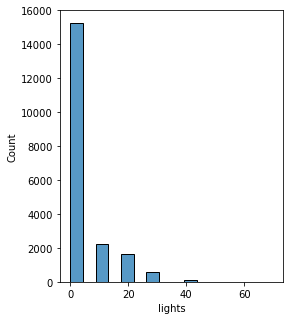

In [8]:
fig, ax = plt.subplots(figsize=(4, 5))
sns.histplot(app_energy['lights'])

<AxesSubplot:>

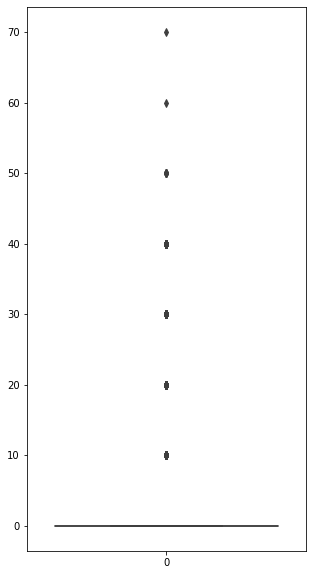

In [9]:
fig, ax = plt.subplots(figsize=(5, 10))
sns.boxplot(data=app_energy['lights'])

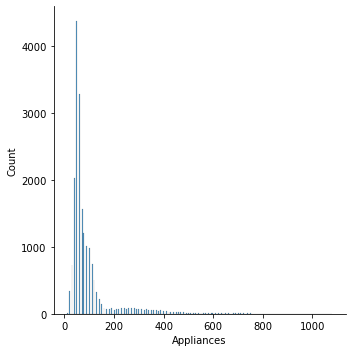

In [10]:
sns.displot(app_energy['Appliances'])

<AxesSubplot:>

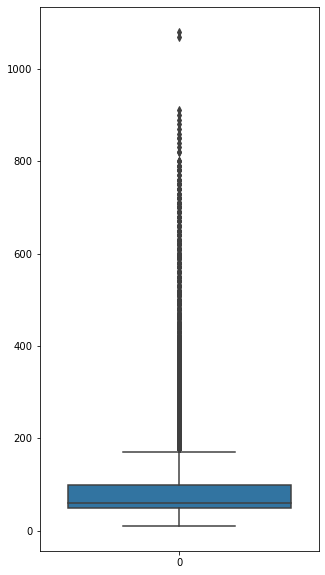

In [11]:
fig, ax = plt.subplots(figsize=(5, 10))
sns.boxplot(data=app_energy['Appliances'])

In [12]:
#Correlation of the features
app_energy.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
T4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
RH_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787


<AxesSubplot:>

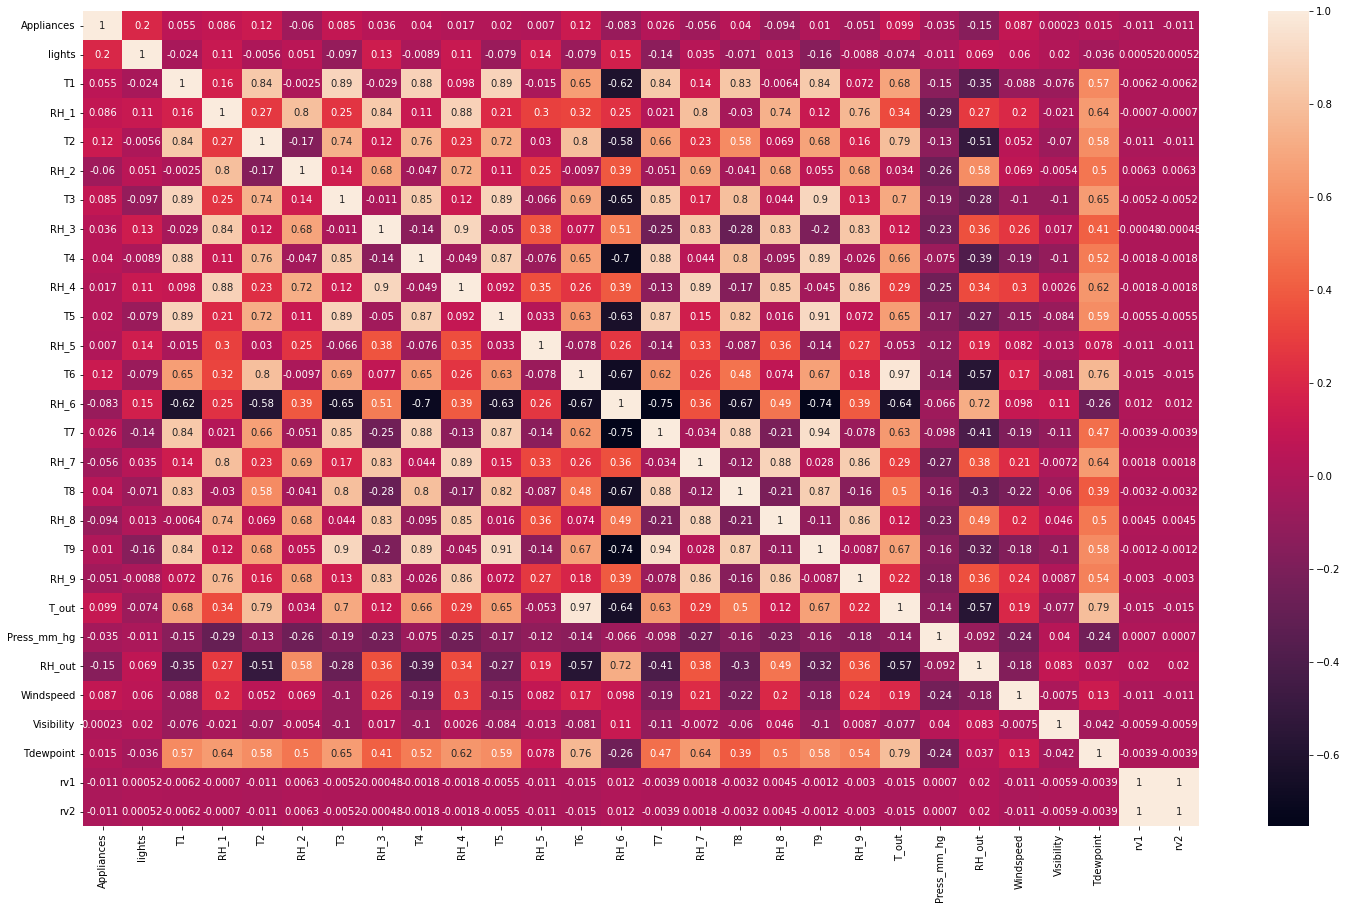

In [13]:
#Visual representation of correlation using heatmap
fig, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(app_energy.corr(), annot=True)

In [14]:
#Normalization
scaler = MinMaxScaler()
fid=app_energy.drop(columns=['date','lights'])
normalized_df = pd.DataFrame(scaler.fit_transform(fid), columns=fid.columns)
features_df = normalized_df.drop(columns=['Appliances'])
target_df = normalized_df['Appliances']

<AxesSubplot:xlabel='T2', ylabel='T6'>

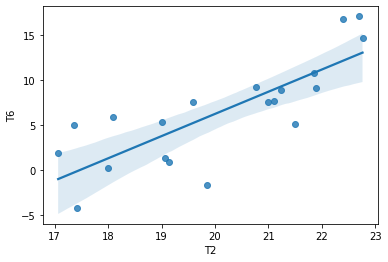

In [15]:
#relationship between the Temp in the living room and the Temp outsidde the building
simple_linear_reg = app_energy[['T2', 'T6']].sample(20, random_state=2)

sns.regplot(x='T2', y='T6', data=simple_linear_reg)

MODELLING

In [16]:
x_train, x_test, y_train, y_test = train_test_split(features_df, target_df, test_size=0.3, random_state=42)

#Linear Regression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [17]:
#Ridge Regression
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4)

In [18]:
#Lasso Regression
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [19]:
models = [['Linear Reg: ',  linear_model],['Lasso: ', lasso_reg],['Ridge: ', ridge_reg]]

In [20]:
#determining the feature weights of each model
def get_weights_df(model, feat, col_name):
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso-Weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights

,Features,Linear_Model_weight,Ridge_Weight,Lasso-Weight
0,RH_2,-0.456698,-0.411071,-0.000000
1,T_out,-0.321860,-0.262172,0.000000
2,T2,-0.236178,-0.201397,0.000000
3,T9,-0.189941,-0.188916,-0.000000
4,RH_8,-0.157595,-0.156830,-0.000110
5,RH_out,-0.077671,-0.054724,-0.049557
6,RH_7,-0.044614,-0.045977,-0.000000
7,RH_9,-0.039800,-0.041367,-0.000000
8,T5,-0.015657,-0.019853,-0.000000
9,T1,-0.003281,-0.018406,0.000000


MODEL TESTING AND METRICS EVALUATION

In [21]:

model_data = []

for name,curr_m in models:
    c_model = {}
    pred = curr_m.predict(x_test)
    c_model["Name"] = name
    
    c_model['MAE'] = mean_absolute_error(y_test,pred)
    
    c_model["R2"] = r2_score(y_test,pred)
    c_model['RMSE'] = np.sqrt(mean_squared_error(y_test,pred))
    
    
    c_model['RSS'] = np.sum(np.square(y_test - pred))
    print
    model_data.append(c_model)

In [22]:
fid = pd.DataFrame(model_data)
round(fid,3)

,Name,MAE,R2,RMSE,RSS
0,Linear Reg:,0.050,0.149,0.088,45.348
1,Lasso:,0.055,0.027,0.094,51.853
2,Ridge:,0.050,0.149,0.088,45.368


<AxesSubplot:title={'center':'METRICS'}, xlabel='Name'>

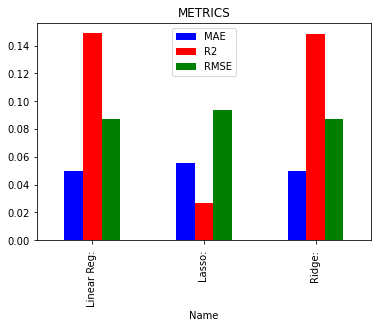

In [23]:
from itertools import cycle, islice
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(fid)))
fid.plot(x="Name", y=['MAE' , 'R2' , 'RMSE'], kind="bar" , title = 'METRICS', color=my_colors)

This concludess that Linear Regression and Ridge Regression are better model for this Prediction than Lasso.